In [46]:
## Load helpers

# Python Basic Tools
import pandas as pd
import numpy as np
import seaborn as sn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Sklearn Basic Tools
import sklearn.metrics
import sklearn.neighbors
from sklearn.model_selection import train_test_split

# Sklearn Regression and Classification Tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB

# Usual cross-val tools and Grid searching 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# Set random seed
np.random.seed(47)



In [4]:
# Import Data
heart_df = pd.read_csv("heart.csv")
heart_df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
# Check missing values
null_count = heart_df.isna().sum()
print(null_count);
print('\n> null count:', sum(heart_df.isna().sum()));



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> null count: 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002E5A7AF0>,
      dtype=object)

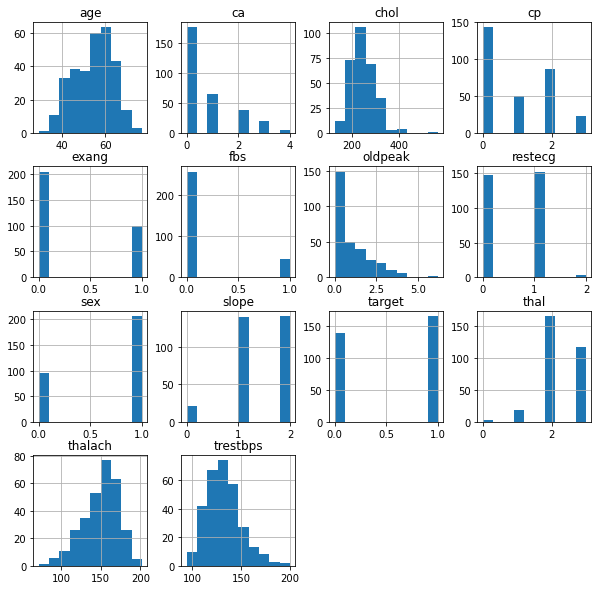

In [14]:
heart_df.hist(figsize = (10,10))

In [8]:
#explore correlations between features
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Correlation Map')

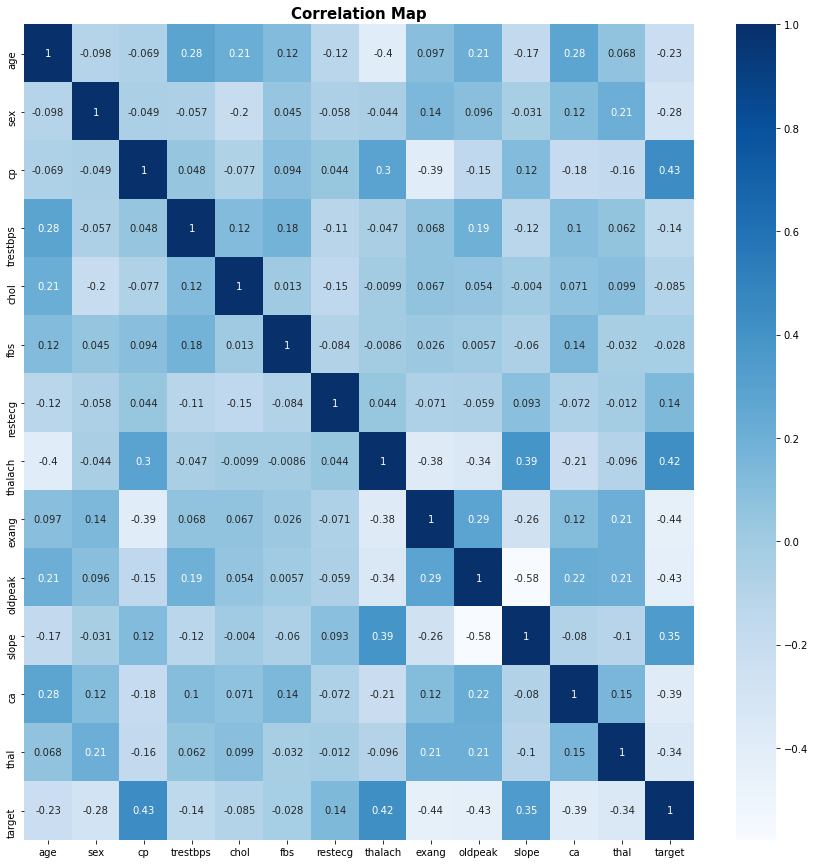

In [15]:
#Use corrMatrix show correlations between features within this dataset
plt.figure(figsize=(15,15))
sn.heatmap(heart_df.corr(), cmap='Blues', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=15)

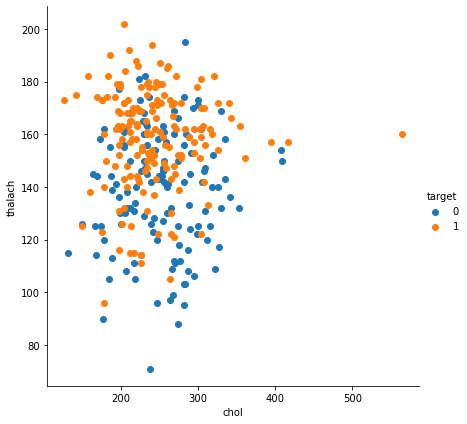

In [31]:
# Classifty target(heart disease patient) with thalach vs chol
sn.FacetGrid(heart_df, hue ="target",
              height = 6).map(plt.scatter,
                              'chol',
                              'thalach').add_legend()

In [21]:
#Explore data distribution within heart disease patients

heart_df1 = heart_df[(heart_df.target == 1)]
heart_df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


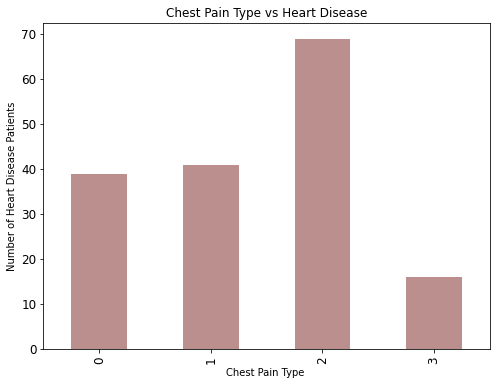

In [25]:
# Chest Pain Type vs Heart Disease

# — Value 0: asymptomatic
# — Value 1: atypical angina
# — Value 2: non-anginal pain
# — Value 3: typical angina

ax = heart_df1[['cp','target']].groupby(['cp']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Chest Pain Type vs Heart Disease", 
                                       color='rosybrown', fontsize=12)
ax.set_xlabel("Chest Pain Type ")
ax.set_ylabel("Number of Heart Disease Patients")
plt.show()

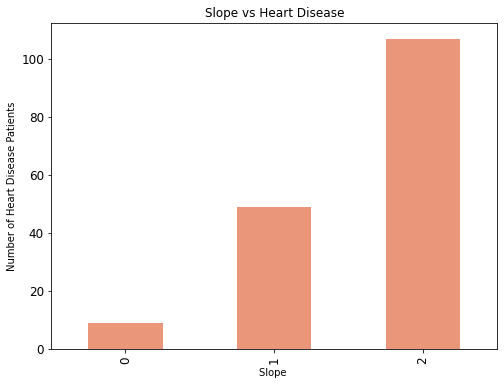

In [32]:
# Slope vs Heart Disease
# the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping


ax = heart_df1[['slope','target']].groupby(['slope']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Slope vs Heart Disease", 
                                       color='darksalmon', fontsize=12)
ax.set_xlabel("Slope ")
ax.set_ylabel("Number of Heart Disease Patients")
plt.show()

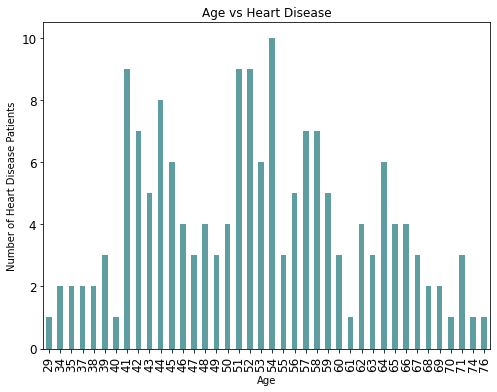

In [40]:
# Age vs Heart Disease
ax = heart_df1[['age','target']].groupby(['age']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Age vs Heart Disease", 
                                       color='CADETBLUE', fontsize=12)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Heart Disease Patients")
plt.show()

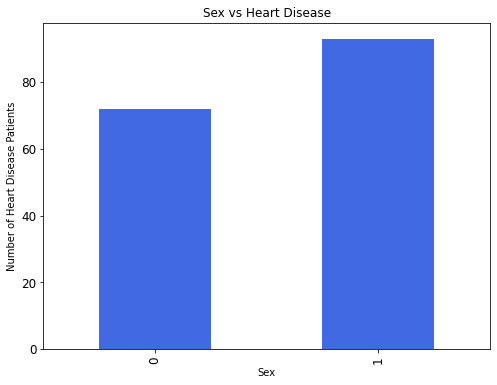

In [41]:
# Sex vs Heart Disease
#The person’s sex (1 = male, 0 = female)
ax = heart_df1[['sex','target']].groupby(['sex']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Sex vs Heart Disease", 
                                       color='royalblue', fontsize=12)
ax.set_xlabel("Sex")
ax.set_ylabel("Number of Heart Disease Patients")
plt.show()

In [42]:
# Seperate data with features and labels
X = heart_df.drop('target', 1) #features
y = heart_df['target']  #labels

# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=47) #split by half

# Normalizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


1.KNN Classifier

In [43]:
# Grid research to find best K-value

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6699453551912569
Best Parameters: {'n_neighbors': 40}


0.8609271523178808
0.7763157894736842
              precision    recall  f1-score   support

           0       0.85      0.60      0.71        68
           1       0.74      0.92      0.82        84

    accuracy                           0.78       152
   macro avg       0.80      0.76      0.76       152
weighted avg       0.79      0.78      0.77       152



Text(0.5, 15.0, 'Predicted label')

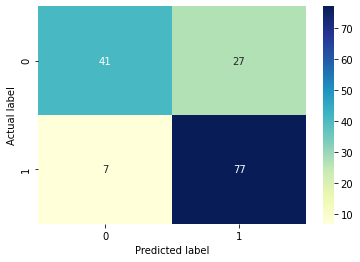

In [44]:
# Apply best k-value with prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40) #best k-value of 40
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)


# Performance of KNN Classifier based on test scores
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

# Performance of KNN Classifier  based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of KNN Classifier based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2.Logistic Regression

0.8807947019867549
0.7894736842105263
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        68
           1       0.80      0.82      0.81        84

    accuracy                           0.79       152
   macro avg       0.79      0.79      0.79       152
weighted avg       0.79      0.79      0.79       152



Text(0.5, 15.0, 'Predicted label')

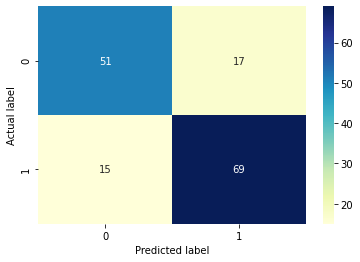

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)

y_test_pred =lr.predict(X_test)
y_train_pred = lr.predict(X_train)

# Performance of Logistic Regression based on test scores
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

# Performance of Logistic Regression based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Logistic Regression based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

3.Naive Bayes

0.847682119205298
0.8289473684210527
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        68
           1       0.83      0.87      0.85        84

    accuracy                           0.83       152
   macro avg       0.83      0.82      0.83       152
weighted avg       0.83      0.83      0.83       152



Text(0.5, 15.0, 'Predicted label')

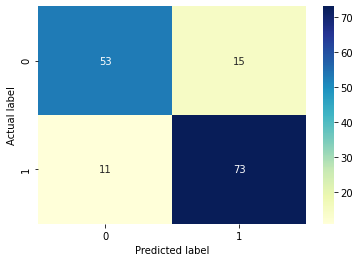

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediction
y_test_pred = nb.predict(X_test)
y_train_pred = nb.predict(X_train)

# Performance of Naive Bayes based on test scores
print(nb.score(X_train,y_train))
print(nb.score(X_test, y_test))

# Performance of Naive Bayes based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Naive Bayes based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

 4.Decision Tree Classifier


In [51]:
# Grid research to find best max_depth value


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':np.arange(1,50)}
dtc = DecisionTreeClassifier()
dtc_cv= GridSearchCV(dtc,param_grid,cv=5)
dtc_cv.fit(X,y)

print("Best Score:" + str(dtc_cv.best_score_))
print("Best Parameters: " + str(dtc_cv.best_params_))


Best Score:0.8051366120218578
Best Parameters: {'max_depth': 3}


0.8874172185430463
0.6907894736842105
              precision    recall  f1-score   support

           0       0.63      0.75      0.68        68
           1       0.76      0.64      0.70        84

    accuracy                           0.69       152
   macro avg       0.70      0.70      0.69       152
weighted avg       0.70      0.69      0.69       152



Text(0.5, 15.0, 'Predicted label')

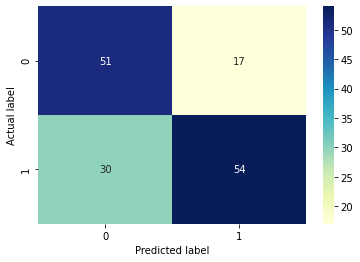

In [52]:
# Apply best best max_depth value with prediction

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)


# Performance of Decision Tree Classifier based on test scores
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

# Performance of Decision Tree Classifier based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Decision Tree Classifier based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

5.Random Forst

In [53]:

# Grid research to find best max_depth value and best n_estimators
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': list(range(1, 50)),
    'max_depth' : [5,10,15,20,25]}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
CV_rfc.best_params_


{'max_depth': 5, 'n_estimators': 28}

0.9867549668874173
0.7894736842105263
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        68
           1       0.79      0.85      0.82        84

    accuracy                           0.79       152
   macro avg       0.79      0.78      0.78       152
weighted avg       0.79      0.79      0.79       152



Text(0.5, 15.0, 'Predicted label')

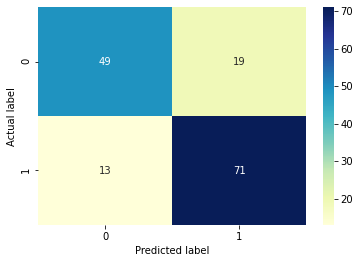

In [54]:
# Apply best best max_depth value with prediction

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=28,max_depth=5)
rfc.fit(X_train,y_train)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)


# Performance of Random Forst based on test scores
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

# Performance of Random Forst based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Random Forst based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

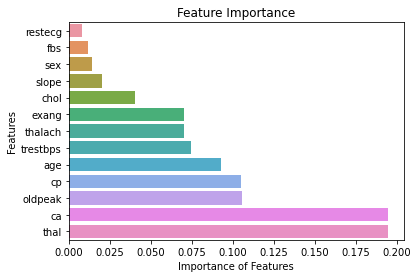

In [61]:
# Variable Importance with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=28,max_depth=5)
rfc.fit(X_train,y_train)

feature_imp = pd.Series(rfc.feature_importances_,
                        index=X.columns).sort_values()

sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

Compare Model Accuracy with this data set: KNN Classifier, Logistic Regression, Naive Bayes, Decision Tree Classifier, and Random Forest


Text(0.5, 1.0, 'Plotting the Model Accuracies')

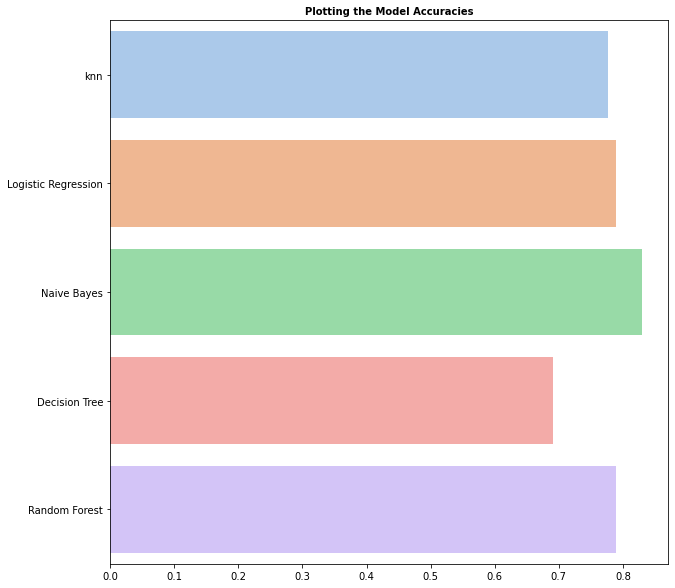

In [60]:
plt.figure(figsize= (10,10))
ac = [knn.score(X_test, y_test),lr.score(X_test, y_test),nb.score(X_test, y_test),dtc.score(X_test, y_test),rfc.score(X_test, y_test)]
name = ['knn','Logistic Regression','Naive Bayes','Decision Tree', 'Random Forest']
sn.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=10, fontweight="bold")